In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import RocCurveDisplay
from sklearn import preprocessing
from tensorflow import keras


In [157]:
ml_df = pd.read_csv(
    "../Dataset/dataset_filled_missing.csv")
ml_df.drop(["Unnamed: 0"], axis=1, inplace=True)
ml_df['Id'] = ['condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'control', 'control',
               'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control']
ml_df


,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,5days_sleep_time_activity,5days_day_time_activity,Id
0,2,37,2,2,2,8,1,2,19,10693.6,228824.0,condition
1,2,42,1,2,2,8,2,2,24,48771.2,239278.2,condition
2,1,47,2,2,2,8,2,2,24,43211.0,317726.0,condition
3,2,27,2,2,2,13,1,1,20,56892.4,194298.2,condition
4,2,52,2,2,2,13,2,2,26,31303.8,200302.2,condition
5,1,37,2,2,2,8,1,2,18,26634.2,240767.8,condition
6,1,22,1,2,2,13,2,1,24,61643.6,335598.2,condition
7,2,27,2,2,2,13,1,2,20,34374.2,284320.6,condition
8,2,47,1,2,2,8,1,2,26,42992.0,203120.0,condition
9,2,47,2,2,2,8,1,2,28,25811.0,482765.0,condition


In [158]:
import math
from matplotlib.colors import ListedColormap

In [159]:
x = []
y = []
count = 0
count_g = 0
count_o = 0

for i in range(len(ml_df["Id"])):

    if ml_df["Id"][i] == "condition":
        x.append(1)
        y.append([ml_df["5days_sleep_time_activity"][i],
                  ml_df["5days_day_time_activity"][i], ml_df["age"][i], ml_df["gender"][i], ml_df["afftype"][i],
                  ml_df["melanch"][i], ml_df["inpatient"][i], ml_df["edu"][i], ml_df["work"][i], ml_df["madrs1"][i], ml_df["marriage"][i]])

    elif ml_df["Id"][i] == "control":
        x.append(0)
        y.append([ml_df["5days_sleep_time_activity"][i],
                  ml_df["5days_day_time_activity"][i], ml_df["age"][i], ml_df["gender"][i], ml_df["afftype"][i],
                  ml_df["melanch"][i], ml_df["inpatient"][i], ml_df["edu"][i], ml_df["work"][i], ml_df["madrs1"][i], ml_df["marriage"][i]])


print(f'Select: {len(y)} set')
y = np.array(y)
x = np.array(x)

print(y)
print(x)


Select: 55 set
[[1.069360e+04 2.288240e+05 3.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 1.900000e+01
  1.000000e+00]
 [4.877120e+04 2.392782e+05 4.200000e+01 2.000000e+00 1.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01
  2.000000e+00]
 [4.321100e+04 3.177260e+05 4.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01
  2.000000e+00]
 [5.689240e+04 1.942982e+05 2.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 1.300000e+01 1.000000e+00 2.000000e+01
  1.000000e+00]
 [3.130380e+04 2.003022e+05 5.200000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 1.300000e+01 2.000000e+00 2.600000e+01
  2.000000e+00]
 [2.663420e+04 2.407678e+05 3.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 1.800000e+01
  1.000000e+00]
 [6.164360e+04 3.355982e+05 2.200000e+01 1.000000e+00 1.000000e+00
  2.000000e+00 2.0

In [160]:
# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=random_state)


In [161]:
print(x_train)
print(y_train)

[1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1
 1 0 0 1 1 0 0]
[[5.014700e+04 1.534946e+05 4.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01
  1.000000e+00]
 [1.032050e+05 4.311018e+05 2.700000e+01 1.000000e+00 0.000000e+00
  2.000000e+00 0.000000e+00 1.300000e+01 1.000000e+00 9.000000e+00
  2.000000e+00]
 [2.958120e+04 2.358314e+05 3.200000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 1.000000e+00 1.800000e+01 2.000000e+00 2.900000e+01
  2.000000e+00]
 [1.914980e+04 1.691192e+05 3.200000e+01 2.000000e+00 0.000000e+00
  2.000000e+00 0.000000e+00 1.800000e+01 1.000000e+00 4.000000e+00
  1.000000e+00]
 [8.464720e+04 3.317996e+05 5.200000e+01 2.000000e+00 0.000000e+00
  2.000000e+00 0.000000e+00 8.000000e+00 1.000000e+00 4.000000e+00
  2.000000e+00]
 [6.471040e+04 3.732576e+05 4.700000e+01 1.000000e+00 0.000000e+00
  2.000000e+00 0.000000e+00 8.000000e+00 1.000000e+00 4.000000e+00
  1.000000e+00]
 [3.43742

In [162]:
def classifier_modeling():
    model = Sequential()
    model.add(Dense(115, input_shape=(11,), activation='relu'))
    model.add(Dense(70, activation='tanh'))
    model.add(Dense(50, activation='tanh'))
    model.add(Dense(90, activation='softsign'))
    model.add(Dense(85, activation='selu'))
    # model.add(Dense(20, activation='elu'))
    # model.add(Dense(130, activation='softsign'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='Adam', metrics=['accuracy'])
    return model


In [163]:
#testing model
model = Sequential()
model.add(Dense(115, input_shape=(11,), activation='relu'))
model.add(Dense(55, activation='selu'))
model.add(Dense(85, activation='selu'))
model.add(Dense(2, activation='tanh'))
model.compile(loss='binary_crossentropy',
              optimizer='Adamax', metrics=['accuracy'])

le = preprocessing.LabelEncoder()
le.fit(x_train)
x_train = le.transform(x_train)
x_train = keras.utils.to_categorical(x_train)

model.fit(y_train, x_train, validation_split=0.2, epochs=50, batch_size=2)


Epoch 1/50
18/18 [==============================] - 1s 9ms/step - loss: 8.7641 - accuracy: 0.4286 - val_loss: 6.8165 - val_accuracy: 0.5556
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 8.7641 - accuracy: 0.4286 - val_loss: 6.8165 - val_accuracy: 0.5556
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 8.7641 - accuracy: 0.4286 - val_loss: 6.8165 - val_accuracy: 0.5556
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 8.7641 - accuracy: 0.4286 - val_loss: 6.8165 - val_accuracy: 0.5556
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 8.7641 - accuracy: 0.4286 - val_loss: 6.8165 - val_accuracy: 0.5556
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 8.7641 - accuracy: 0.4286 - val_loss: 6.8165 - val_accuracy: 0.5556
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 8.7641 - accuracy: 0.4286 - val_loss: 6.8165 - val_accuracy: 0.5556
Epoch 8/50
18/18 [==

Automatically created module for IPython interactive environment
Epoch 1/430
2/2 [==============================] - 1s 153ms/step - loss: 0.8039 - accuracy: 0.2857 - val_loss: 0.9440 - val_accuracy: 0.0000e+00
Epoch 2/430
2/2 [==============================] - 0s 32ms/step - loss: 0.6123 - accuracy: 0.7143 - val_loss: 1.2897 - val_accuracy: 0.0000e+00
Epoch 3/430
2/2 [==============================] - 0s 27ms/step - loss: 0.6100 - accuracy: 0.7143 - val_loss: 1.6090 - val_accuracy: 0.0000e+00
Epoch 4/430
2/2 [==============================] - 0s 25ms/step - loss: 0.6098 - accuracy: 0.7143 - val_loss: 1.6879 - val_accuracy: 0.0000e+00
Epoch 5/430
2/2 [==============================] - 0s 27ms/step - loss: 0.6062 - accuracy: 0.7143 - val_loss: 1.6177 - val_accuracy: 0.0000e+00
Epoch 6/430
2/2 [==============================] - 0s 26ms/step - loss: 0.5820 - accuracy: 0.7143 - val_loss: 1.4555 - val_accuracy: 0.0000e+00
Epoch 7/430
2/2 [==============================] - 0s 63ms/step - loss

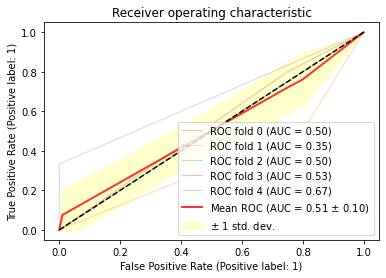

In [164]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
import pickle
import matplotlib.pyplot as plt
print(__doc__)


# Add noisy features
random_state = np.random.RandomState(0)

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=random_state)

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)

history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

x_train = np.argmax(x_train, axis=1) 

for i, (train, val) in enumerate(cv.split(y_train, x_train)):

    X_train, X_val = y[train], y[val]
    y_train, y_val = x[train], x[val]

    le = preprocessing.LabelEncoder()
    le.fit(y_train)
    y_train = le.transform(y_train)
    y_train = keras.utils.to_categorical(y_train)

    
    classifier = classifier_modeling()

    # Fit model
    classifier.fit(X_train, y_train, validation_split=0.2, epochs=430, batch_size=20)

    # Save model
    with open('model\\ann_wofill', 'wb') as f:
        pickle.dump(classifier, f)

    # Predict
    predict = classifier.predict(X_val)
    predict = np.argmax(predict, axis=1)

    viz = RocCurveDisplay.from_predictions(y_val, predict, name='ROC fold {}'.format(i),
                           alpha=0.3, lw=1, ax=ax)                     
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="r",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="yellow",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig(
    'graph\\ann_wofill_graph.jpg')
plt.show()




In [165]:
# print(y_test)
# print(x_test)


[0 0 0 0 1 0 0 1 0 0 0]
[0 0 0 0 1 1 0 0 0 0 1]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.50      0.33      0.40         3

    accuracy                           0.73        11
   macro avg       0.64      0.60      0.61        11
weighted avg       0.70      0.73      0.71        11

Sensitivity :  0.5
Specificity :  0.7777777777777778
accuracy : 0.7272727272727273



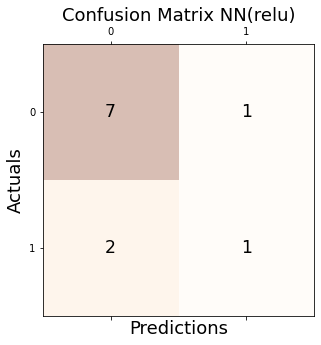

In [166]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Report
predict = classifier.predict(y_test)
predict = np.argmax(predict, axis=1)
# x_test = x_test[:,0]

print(predict)
print(x_test)

print(classification_report(x_test, predict))

conf = confusion_matrix(x_test, predict)
sensitivity = conf[1, 1]/(conf[0, 1]+conf[1, 1])
specificity = conf[0, 0]/(conf[0, 0]+conf[1, 0])

print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)
# print('Precision: %.3f' % precision_score(y_pred, y_true))
# print('F1 Score: %.3f' % f1_score(y_pred, y_true))
print(f"accuracy : {accuracy_score(x_test, predict)}\n")

# Plot cofusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        ax.text(x=j, y=i, s=conf[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix NN(relu)', fontsize=18)
plt.savefig(
    'matrix\\ann_filled_matrix.jpg')
plt.show()

